# Neural Network

<img src="images/nn.jpg" alt="Drawing" style="width: 700px;"/>

<img src="images/neural-network.png" alt="Drawing" style="width: 700px;"/>

In [1]:
import numpy as np
np.random.seed(90)

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor

%matplotlib inline


In [2]:
from chemml.datasets import load_organic_density
smiles, density, features = load_organic_density()

X = features.values
y = density.values.reshape(-1)

/anaconda2/envs/chemml_dev/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda2/envs/chemml_dev/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda2/envs/chemml_dev/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


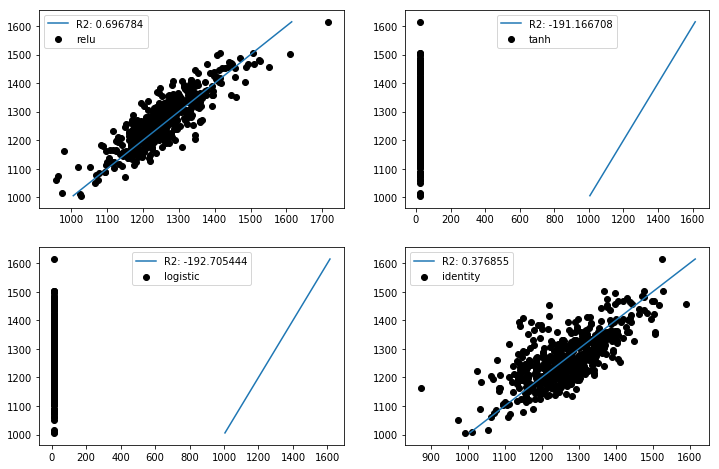

In [3]:
max_iter = 500

mlpr = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'relu', max_iter=max_iter)
mlpr.fit(X,y)

mlpt = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'tanh', max_iter=max_iter)
mlpt.fit(X,y)

mlpl = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'logistic', max_iter=max_iter)
mlpl.fit(X,y)

mlpi = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'identity', max_iter=max_iter)
mlpi.fit(X,y)


# plot the fitted lines
fig = plt.figure(figsize=[12,8])
plt.subplot(2,2,1)
min_y = min(y)
max_y = max(y)
plt.plot([min_y,max_y],[min_y,max_y], label='R2: %f'%mlpr.score(X,y))
plt.scatter(mlpr.predict(X),y, c='k', label='relu')
plt.legend()
plt.subplot(2,2,2)
plt.plot([min_y,max_y],[min_y,max_y], label='R2: %f'%mlpt.score(X,y))
plt.scatter(mlpt.predict(X),y, c='k', label='tanh')
plt.legend()
plt.subplot(2,2,3)
plt.plot([min_y,max_y],[min_y,max_y], label='R2: %f'%mlpl.score(X,y))
plt.scatter(mlpl.predict(X),y, c='k', label='logistic')
plt.legend()
plt.subplot(2,2,4)
plt.plot([min_y,max_y],[min_y,max_y], label='R2: %f'%mlpi.score(X,y))
plt.scatter(mlpi.predict(X),y, c='k', label='identity')
plt.legend()




In [4]:
print ('# negative X:', (X<0).any().sum())
print ('maximum min of all features:', X.min().max())


# negative X: 1
maximum min of all features: -0.003


In [5]:
(y<0).any().sum()


0

## Activation functions
A list of activation functions:
https://en.wikipedia.org/wiki/Activation_function

- range of inputs and outputs
- derivative at different input values

## Impact of normalizing data 

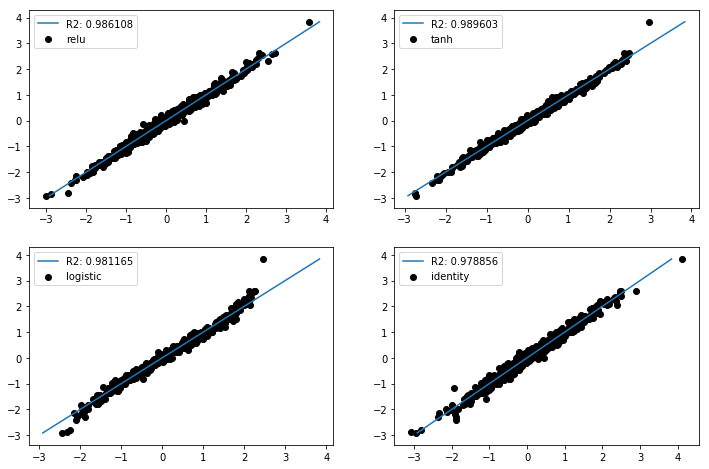

In [6]:
from sklearn import preprocessing

scalerSS = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
Xscaled = scalerSS.fit_transform(X)
yscaled = scalerSS.fit_transform(y.reshape(-1,1)).reshape(-1)

max_iter= 500

# define and fit models
mlpr = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'relu', max_iter=max_iter)
mlpr.fit(Xscaled,yscaled)

mlpt = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'tanh', max_iter=max_iter)
mlpt.fit(Xscaled,yscaled)

mlpl = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'logistic', max_iter=max_iter)
mlpl.fit(Xscaled,yscaled)

mlpi = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'identity', max_iter=max_iter)
mlpi.fit(Xscaled,yscaled)

# plot the fitted lines
fig = plt.figure(figsize=[12,8])
min_y = min(yscaled)
max_y = max(yscaled)

plt.subplot(2,2,1)
plt.plot([min_y,max_y],[min_y,max_y], label='R2: %f'%mlpr.score(Xscaled,yscaled))
plt.scatter(mlpr.predict(Xscaled),yscaled, c='k', label='relu')
plt.legend()

plt.subplot(2,2,2)
plt.plot([min_y,max_y],[min_y,max_y], label='R2: %f'%mlpt.score(Xscaled,yscaled))
plt.scatter(mlpt.predict(Xscaled),yscaled, c='k', label='tanh')
plt.legend()

plt.subplot(2,2,3)
plt.plot([min_y,max_y],[min_y,max_y], label='R2: %f'%mlpl.score(Xscaled,yscaled))
plt.scatter(mlpl.predict(Xscaled),yscaled, c='k', label='logistic')
plt.legend()

plt.subplot(2,2,4)
plt.plot([min_y,max_y],[min_y,max_y], label='R2: %f'%mlpi.score(Xscaled,yscaled))
plt.scatter(mlpi.predict(Xscaled),yscaled, c='k', label='identity')
plt.legend()



/anaconda2/envs/chemml_dev/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda2/envs/chemml_dev/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda2/envs/chemml_dev/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda2/envs/chemml_dev/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

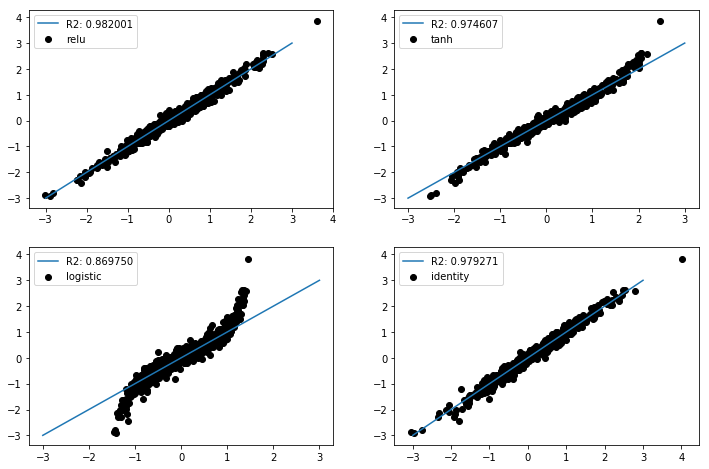

In [7]:
from sklearn import preprocessing

scalerSS = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
Xscaled = scalerSS.fit_transform(X)
yscaled = scalerSS.fit_transform(y.reshape(-1,1)).reshape(-1)



mlpr = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'relu', alpha = 3)
mlpr.fit(Xscaled,yscaled)

mlpt = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'tanh', alpha = 3)
mlpt.fit(Xscaled,yscaled)

mlpl = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'logistic', alpha = 3)
mlpl.fit(Xscaled,yscaled)

mlpi = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'identity', alpha = 3)
mlpi.fit(Xscaled,yscaled)


# plot the fitted lines
fig = plt.figure(figsize=[12,8])
plt.subplot(2,2,1)
plt.plot([-3,3],[-3,3], label='R2: %f'%mlpr.score(Xscaled,yscaled))
plt.scatter(mlpr.predict(Xscaled),yscaled, c='k', label='relu')
plt.legend()
plt.subplot(2,2,2)
plt.plot([-3,3],[-3,3], label='R2: %f'%mlpt.score(Xscaled,yscaled))
plt.scatter(mlpt.predict(Xscaled),yscaled, c='k', label='tanh')
plt.legend()
plt.subplot(2,2,3)
plt.plot([-3,3],[-3,3], label='R2: %f'%mlpl.score(Xscaled,yscaled))
plt.scatter(mlpl.predict(Xscaled),yscaled, c='k', label='logistic')
plt.legend()
plt.subplot(2,2,4)
plt.plot([-3,3],[-3,3], label='R2: %f'%mlpi.score(Xscaled,yscaled))
plt.scatter(mlpi.predict(Xscaled),yscaled, c='k', label='identity')
plt.legend()

## Early stopping

In [8]:
mlpr = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'relu', alpha = 1, max_iter=500, verbose = 1)
mlpr.fit(Xscaled,yscaled)

print (mlpr.score(Xscaled,yscaled))



Iteration 1, loss = 0.81714965
Iteration 2, loss = 0.68366910
Iteration 3, loss = 0.59078062
Iteration 4, loss = 0.52090641
Iteration 5, loss = 0.46091939
Iteration 6, loss = 0.41366507
Iteration 7, loss = 0.37129231
Iteration 8, loss = 0.33710184
Iteration 9, loss = 0.30889341
Iteration 10, loss = 0.28638373
Iteration 11, loss = 0.27133857
Iteration 12, loss = 0.25781383
Iteration 13, loss = 0.24661816
Iteration 14, loss = 0.23682291
Iteration 15, loss = 0.22734309
Iteration 16, loss = 0.21783784
Iteration 17, loss = 0.21027133
Iteration 18, loss = 0.20342182
Iteration 19, loss = 0.19726883
Iteration 20, loss = 0.19251484
Iteration 21, loss = 0.18787167
Iteration 22, loss = 0.18367725
Iteration 23, loss = 0.18041926
Iteration 24, loss = 0.17652642
Iteration 25, loss = 0.17365313
Iteration 26, loss = 0.17093253
Iteration 27, loss = 0.16812917
Iteration 28, loss = 0.16586399
Iteration 29, loss = 0.16328403
Iteration 30, loss = 0.16090834
Iteration 31, loss = 0.15880400
Iteration 32, los

Iteration 327, loss = 0.02254442
Iteration 328, loss = 0.02244549
Iteration 329, loss = 0.02269518
Iteration 330, loss = 0.02238304
Iteration 331, loss = 0.02236173
Iteration 332, loss = 0.02240566
Iteration 333, loss = 0.02247899
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
0.9886010684954922


In [9]:
# with early_stopping
mlpr = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'relu', alpha = 1, verbose = 1, early_stopping=True)
mlpr.fit(Xscaled,yscaled)

print (mlpr.score(Xscaled,yscaled))




Iteration 1, loss = 1.41766064
Validation score: -1.429349
Iteration 2, loss = 1.01654549
Validation score: -0.816361
Iteration 3, loss = 0.82343837
Validation score: -0.354767
Iteration 4, loss = 0.68789641
Validation score: -0.079656
Iteration 5, loss = 0.60135282
Validation score: 0.108110
Iteration 6, loss = 0.53954552
Validation score: 0.264200
Iteration 7, loss = 0.49728839
Validation score: 0.398958
Iteration 8, loss = 0.46403623
Validation score: 0.499097
Iteration 9, loss = 0.43415116
Validation score: 0.558668
Iteration 10, loss = 0.41028142
Validation score: 0.599427
Iteration 11, loss = 0.39254180
Validation score: 0.633324
Iteration 12, loss = 0.37405267
Validation score: 0.668536
Iteration 13, loss = 0.35537560
Validation score: 0.699134
Iteration 14, loss = 0.33908568
Validation score: 0.725921
Iteration 15, loss = 0.32530998
Validation score: 0.751143
Iteration 16, loss = 0.31387685
Validation score: 0.773119
Iteration 17, loss = 0.30468738
Validation score: 0.791601
It

## Keras

In [11]:
from keras.layers import Input, Dense, Concatenate
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.initializers import glorot_uniform
from keras import regularizers
from keras import losses
from keras import backend as K

Using TensorFlow backend.


In [10]:
def model_creator(nneurons=features.shape[1], activation=['relu','tanh'], lr = 0.001):
    # branch 1
    b1_in = Input(shape=(nneurons, ), name='inp1')
    l1 = Dense(12, name='l1', activation=activation[0])(b1_in)
    b1_l1 = Dense(6, name='b1_l1', activation=activation[0])(l1)
    b1_l2 = Dense(3, name='b1_l2', activation=activation[0])(b1_l1)
    # branch 2
    b2_l1 = Dense(16, name='b2_l1', activation=activation[1])(l1)
    b2_l2 = Dense(8, name='b2_l2', activation=activation[1])(b2_l1)
    # merge branches
    merged = Concatenate(name='merged')([b1_l2, b2_l2])
    # linear output
    out = Dense(1, name='outp', activation='linear')(merged)
    ###
    model = Model(inputs = b1_in, outputs = out)
    adam = Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0)
    model.compile(optimizer = adam,
                  loss = 'mean_squared_error',
                  metrics=['mean_absolute_error'])
    return model



In [12]:
m = model_creator()
m.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inp1 (InputLayer)               (None, 200)          0                                            
__________________________________________________________________________________________________
l1 (Dense)                      (None, 12)           2412        inp1[0][0]                       
__________________________________________________________________________________________________
b1_l1 (Dense)                   (None, 6)            78          l1[0][0]                         
__________________________________________________________________________________________________
b2_l1 (Dense)                   (None, 16)           208         l1[0][0]                         
_____________________________________

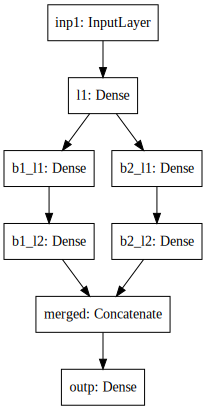

In [13]:
# You need to install `pydot`. For example with `pip install pydot`.
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(m).create(prog='dot', format='svg'))